In [1]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The solve_ivp solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [ ]:
def predator_prey(t, y):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (ndarray): A ndarray corresponding to right hand side of the Predator-
            Prey model.
    """
    #define right hand side of equation
    dr_dt = y[0]*(1 - .5*y[1])
    dw_dt = y[1]*(-.75 + .25*y[0])

    #use solve_ivp
    ode = np.array([dr_dt, dw_dt])

    return ode

# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

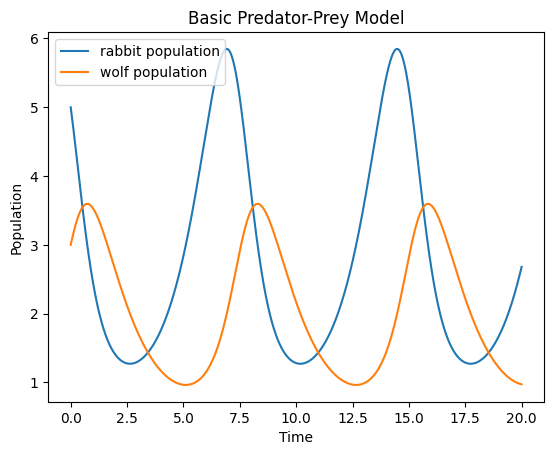

In [5]:
# element 2: the time domain
t_span = (0,20)

# element 3: the initial conditions
y0 = np.array([5, 3])

# solve the system
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
sol = solve_ivp(predator_prey, t_span, y0, max_step=0.01)

# plot the basic predator-prey model
plt.plot(sol.t, sol.y[0], label = "rabbit population")
plt.plot(sol.t, sol.y[1], label = "wolf population")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Basic Predator-Prey Model")
plt.legend()
plt.show()


# Problem 3

Similar to problem 1, define the function Lotka_Volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using solve_ivp, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

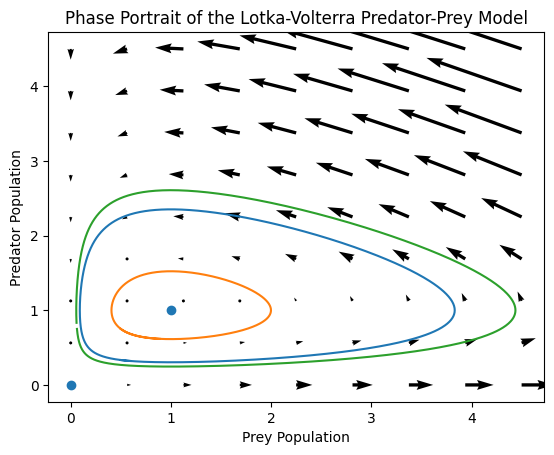

In [25]:
def Lotka_Volterra(t, y):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    dU = y[0]*(1 - y[1])
    dV = 1/3*(y[1]*(y[0]-1))
    return (dU, dV)

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra(0, (Y1, Y2))
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

t_span = (0, 13)
# plot the solve_IVP
for y in [(1/2, 1/3), (1/2, 3/4), (1/16, 3/4)]:
    sol = solve_ivp(Lotka_Volterra, t_span, y, max_step=0.01)
    plt.plot(sol.y[0], sol.y[1])

# plot the equilibria
plt.scatter((0,1), (0,1))

plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
plt.show()

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use solve_ivp to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

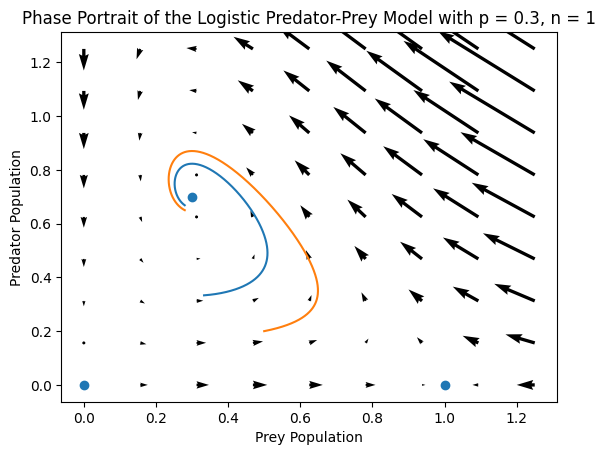

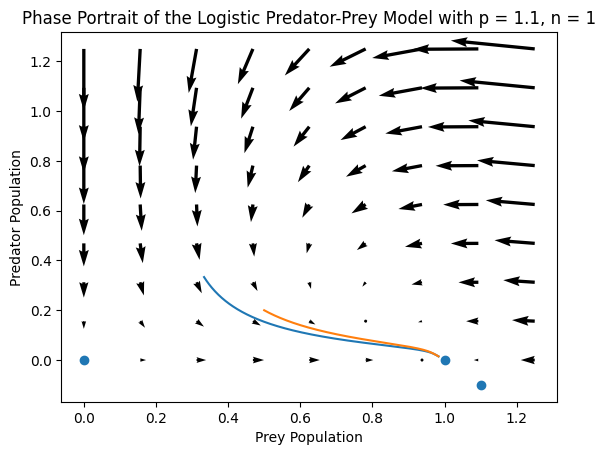

In [36]:
def Logistic_Model_3(t, y, n, p):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    dU = y[0]*(1 - y[0] - y[1])
    dV = n * (y[1]*(y[0]-p))
    return (dU, dV)

for n, p in [(1, .3), (1, 1.1)]:
    # Provided code for plotting phase portrait.
    Y1, Y2 = np.meshgrid(np.linspace(0,1.25,25), np.linspace(0,1.25,25))
    dU, dV = Logistic_Model_3(0, (Y1, Y2), n, p)
    Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

    t_span = (0, 13)
    # plot the solve_IVP
    for y in [(1/3, 1/3), (1/2, 1/5)]:
        sol = solve_ivp(Logistic_Model_3, t_span, y, max_step=0.01, args=(n, p))
        plt.plot(sol.y[0], sol.y[1])

    # plot the equilibria
    plt.scatter((0,p,1), (0,1-p,0))

    plt.xlabel("Prey Population")
    plt.ylabel("Predator Population")
    plt.title(f"Phase Portrait of the Logistic Predator-Prey Model with p = {p}, n = {n}")
    plt.show()

    

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbe’s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [38]:
def forbes(F_t):

    # define forbes as stated in (5.5)
    p_L = 1800
    p_F = 9400
    C = 10.4*(p_L/p_F)

    return C/(C+F_t)

def energy_balance(F_t, L_t, PAL, EI, K):

    # defines energy balance system from (5.8)
    numer = (1/PAL - 0.14)*EI - K - 3.2*F_t - 22*L_t
    denom = (180/9400)*(1-forbes(F_t)) + (180/1800)*forbes(F_t) + (1/PAL)

    return numer/denom

def weight_odesystem(t, y, PAL, EI, K):
    # takes as input the current time as a float t 
    # and the current fat and lean weights as an array 
    # y and returns the right hand side of (5.4) as a tuple
    fat = y[0]
    lean = y[1]
    dF = (1 - forbes(fat))*energy_balance(fat, lean, PAL, EI, K)
    dL = forbes(fat)*energy_balance(fat, lean, PAL, EI, K)

    return (dF/9400, dL/1800)

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use solve_ivp to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

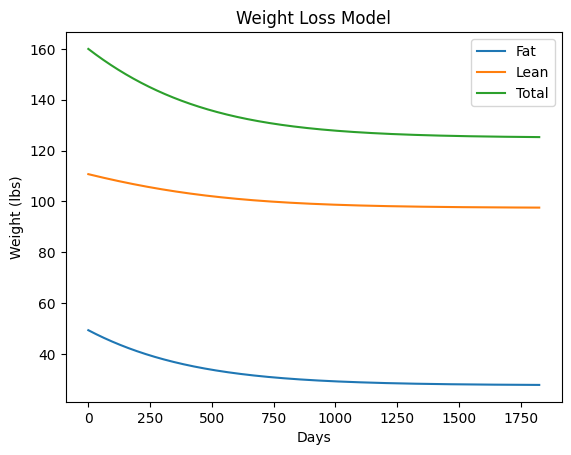

In [45]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

# initial condition setup
height = 5.6666*0.305
weight = 160/2.204

F_0 = fat_mass(weight, 38, height, "female")
L_0 = weight - F_0

K = (1/1.4 - 0.14)*2143 - 3.2*F_0 - 22*L_0
y0 = (F_0, L_0)
t_span = (0, 1825)

sol = solve_ivp(weight_odesystem, t_span, y0, max_step=0.01, args=(1.5, 2025, K))

# plot the basic predator-prey model
plt.plot(sol.t, sol.y[0]*2.204, label = "Fat")
plt.plot(sol.t, sol.y[1]*2.204, label = "Lean")
plt.plot(sol.t, (sol.y[1]+sol.y[0])*2.204, label = "Total")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.title("Weight Loss Model")
plt.legend()
plt.show()


# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

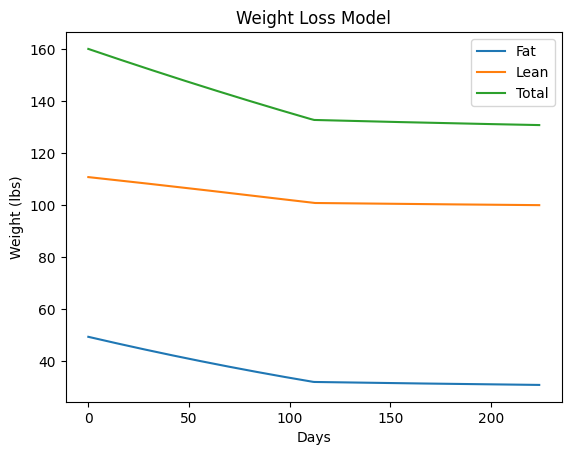

In [47]:
# redefine two t_spans
t_span = (0, 112)
t_span_2 = (112, 224)

# define first weeks of solution
sol = solve_ivp(weight_odesystem, t_span, y0, max_step=0.01, args=(1.7, 1600, K))

y0_1 = (sol.y[0][-1], sol.y[1][-1])

sol2 = solve_ivp(weight_odesystem, t_span_2, y0_1, max_step=0.01, args=(1.5, 2025, K))
# concatenate two time steps, and two y values
t = np.concatenate((sol.t, sol2.t))
fat = np.concatenate((sol.y[0], sol2.y[0]))
lean = np.concatenate((sol.y[1], sol2.y[1]))
total = fat+lean

# plot the basic predator-prey model
plt.plot(t, fat*2.204, label = "Fat")
plt.plot(t, lean*2.204, label = "Lean")
plt.plot(t, total*2.204, label = "Total")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.title("Weight Loss Model")
plt.legend()
plt.show()